In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data collection and Processing 

In [27]:
path = 'train.csv'
path2 ='test.csv'
titanic = pd.read_csv(path)
test = pd.read_csv(path2)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
# basics info about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# check of missing values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling missing values

In [30]:
# coloum cabin most of his data is null so we will drop it 

titanic = titanic.drop(columns= 'Cabin',axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [31]:
# for age coloum we will use the mean 

mean = titanic['Age'].mean()
titanic['Age'].fillna(mean,inplace=True)

mean = test['Age'].mean()
test['Age'].fillna(mean,inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [32]:
# for Embarked we will drop the rows that are null

titanic['Embarked'] = titanic['Embarked'].dropna()
titanic = titanic.dropna()

test['Embarked'] = test['Embarked'].dropna()
test = test.dropna()

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

#### Sex Feature

Text(0.5, 1.0, 'is women survived more ?')

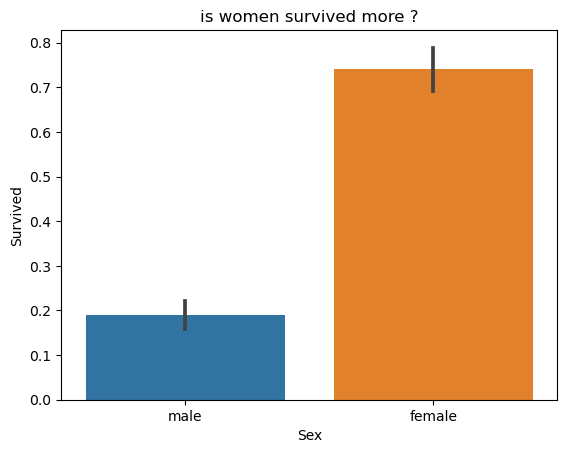

In [33]:
sns.barplot(x='Sex', y= 'Survived',data= titanic)
plt.title('is women survived more ?')

### Pclass Feature

Text(0.5, 1.0, 'is first class survived more ?')

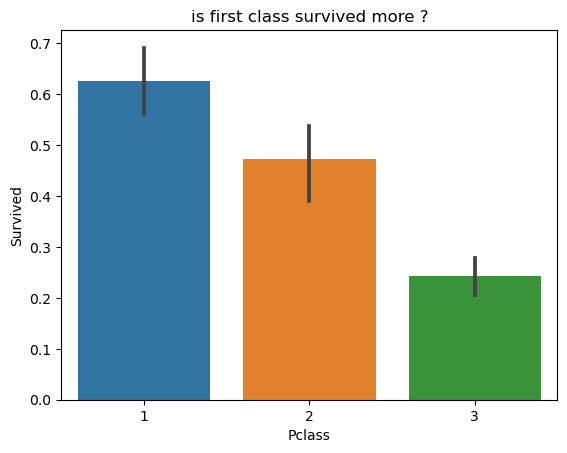

In [34]:
sns.barplot(x='Pclass', y= 'Survived',data= titanic)
plt.title('is first class survived more ?')

### SibSp Feature


Text(0.5, 1.0, 'is people with siblings or spouses survived more ?')

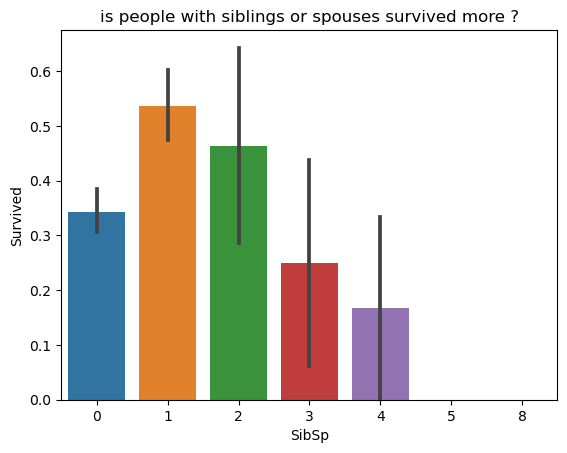

In [35]:
sns.barplot(x='SibSp', y= 'Survived',data= titanic)
plt.title('is people with siblings or spouses survived more ?')

### Parch  Feature


Text(0.5, 1.0, 'is people with parents or children  survived more ?')

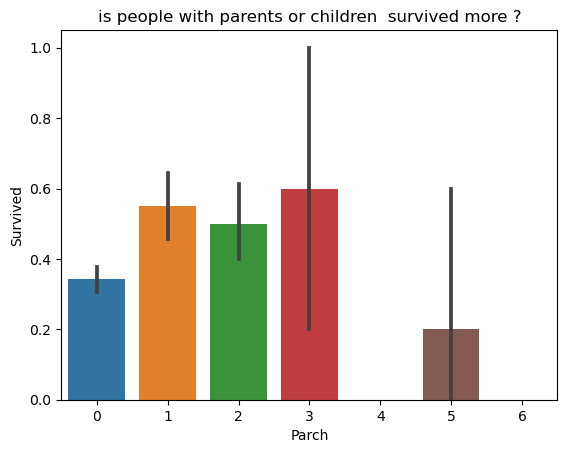

In [36]:
sns.barplot(x='Parch', y= 'Survived',data= titanic)
plt.title('is people with parents or children  survived more ?')

### Age  Feature


C:\Users\amirr\AppData\Local\Temp\ipykernel_12920\4274095797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age_Group'] = pd.cut(titanic['Age'],bins=bins,labels=labels)


Text(0.5, 1.0, 'which age_groub survived most ?')

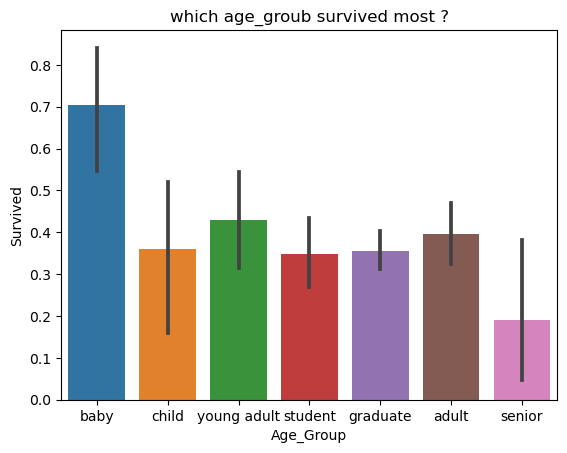

In [37]:
bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'baby','child','young adult', 'student', 'graduate','adult','senior']
titanic['Age_Group'] = pd.cut(titanic['Age'],bins=bins,labels=labels)
test['Age_Group'] = pd.cut(test['Age'],bins=bins,labels=labels)

sns.barplot(x='Age_Group', y= 'Survived',data= titanic)
plt.title('which age_groub survived most ?')

### some more data analysis

In [38]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split()[0].replace('.', ''))
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split()[0].replace('.', ''))

C:\Users\amirr\AppData\Local\Temp\ipykernel_12920\3583421205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split()[0].replace('.', ''))


In [39]:
compare =['Name','Title']
titanic[compare].head(50)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [40]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the', 'Jonkheer'],
      dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#strat encoding category variables
titanic['Title'] = label_encoder.fit_transform(titanic['Title'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Age_Group'] = label_encoder.fit_transform(titanic['Age_Group'])

test['Title'] = label_encoder.fit_transform(test['Title'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Age_Group'] = label_encoder.fit_transform(test['Age_Group'])

titanic

C:\Users\amirr\AppData\Local\Temp\ipykernel_12920\2919204365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Title'] = label_encoder.fit_transform(titanic['Title'])
C:\Users\amirr\AppData\Local\Temp\ipykernel_12920\2919204365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
C:\Users\amirr\AppData\Local\Temp\ipykernel_12920\2919204365.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2,5,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0,0,12
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2,3,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,12
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2,3,14
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2,5,8
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2,3,8
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0,3,11


In [42]:
titanic = titanic.drop(columns=['Name','Ticket'])

In [43]:
x = titanic.drop(columns=['Survived','PassengerId'])

y = titanic['Survived']

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [44]:
model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred,y_test)
accuracy

C:\Users\amirr\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.797752808988764

In [45]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Title
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",0,23.0,1,0,21228,82.2667,B45,2,5,6
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",0,47.0,1,0,W.E.P. 5734,61.1750,E31,2,0,6
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",0,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,0,0,6
26,918,1,"Ostby, Miss. Helene Ragnhild",0,22.0,0,1,113509,61.9792,B36,0,5,4
28,920,1,"Brady, Mr. John Bertram",1,41.0,0,0,113054,30.5000,A21,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",1,43.0,1,0,17765,27.7208,D40,0,0,5
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",1,20.0,0,0,SC/PARIS 2166,13.8625,D38,0,5,5
407,1299,1,"Widener, Mr. George Dunton",1,50.0,1,1,113503,211.5000,C80,0,0,5
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,37.0,1,0,19928,90.0000,C78,1,0,6


In [46]:
test = test.drop(columns='Cabin')

In [47]:
ids = test['PassengerId']
predictions = model.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

C:\Users\amirr\python\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Name
- Ticket
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)'